# Aula 06: Relatório de Análise Exploratória           

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---


## Importar Dataset
**Fonte:** https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhanushnarayananr/credit-card-fraud")

print("Path to dataset files:", path)

100%|██████████| 28.9M/28.9M [00:00<00:00, 83.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dhanushnarayananr/credit-card-fraud/versions/1


## Criar Dataframe

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path_csv = os.path.join(path, 'card_transdata.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


In [3]:
display(df.describe())

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


---
## Parte 1: A Estrutura de um Bom Relatório de EDA



### Reflita e responda



1.    **O Fio da Meada**: "Qual é a 'espinha dorsal' do seu relatório? Deve-se organizá-lo por tipo de gráfico (todos os histogramas, depois todos os boxplots) ou por 'perguntas de investigação' (ex: 'Investigando o Perfil do Cliente', 'Investigando Fatores de Preço')? Qual abordagem conta uma história melhor?"

**Resp.:** No nosso, uma mistura dos dois, respondendo as "Perguntas de investigação" com gráficos. Dessa forma, a pergunta seria uma espécie de explicação do que o gráfico significa.


2.   **Relembrando o Objetivo**: "Releia sua pergunta de negócio das Aulas 01 e 02. Cada gráfico e cada linha de texto que você escreveu, de alguma forma, ajudou a chegar mais perto daquela resposta. Se um gráfico é bonito, mas não ajuda, ele deve entrar no relatório final?"

**Resp.:** Não deve ser incluido, os gráficos só são pertinentes ao relatório final se eles nos trazem informações relevantes.



---
---
---
---
---

# Relatório de Análise Exploratória: Manseira Credit / credit-card-fraud

**Dupla:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper

**Data:** 16/09/2025


---
## 1. Introdução e Pergunta de Negócio

Neste relatório, realizamos uma análise exploratória no dataset **credit-card-fraud**. Nosso objetivo principal é investigar a seguinte pergunta de negócio: **"Quais fatores indicam que uma compra com cartão de crédito é fraudulenta?"**.

A nossa variável-alvo (aquilo que queremos eventualmente prever ou entender) é a coluna '**fraud**'. As análises a seguir buscam identificar quais outras variáveis têm maior influência sobre ela.


---
## 2. Análise Univariada: Entendendo as Variáveis Principais

In [ ]:
Primeiro, analisamos a distribuição das variáveis mais importantes individualmente para entender o perfil dos nossos dados.

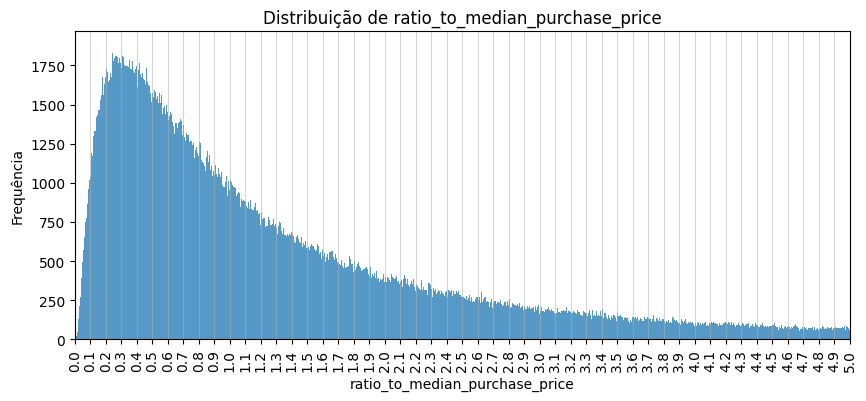

In [5]:
ratio_to_median_purchase_price = 'ratio_to_median_purchase_price'

if ratio_to_median_purchase_price in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[ratio_to_median_purchase_price], bins=100000)
    plt.title(f'Distribuição de {ratio_to_median_purchase_price}')
    plt.xlabel(ratio_to_median_purchase_price)
    plt.ylabel('Frequência')
    plt.xlim(0, 5) # AQUI VAI DAR ZOOM NO GRAFICO PRA GENTE VER SO UMA PARTE
    plt.xticks(np.arange(0, 5.1, 0.1), rotation=90) # aqui aumenta a precisao do X axis
    plt.grid(axis='x', alpha=0.5)
    plt.show()

**Insight 1**: O gráfico acima mostra que a maioria das compras tem um valor próximo de 0.3 vezes o valor médio de compras, além disso, a quantidade de compras diminui muito a partir de 0.5 vezes e começa a tender à 0 a partir de 3 vezes.. Isso é importante porque nos permite entender o gasto médio das pessoas, o que vai ser útil na hora de interpretar os gráficos que relacionam fraude com valor gasto. Nossa conclusão com base nesse gráfico é que as pessoas costumam fazer mais compras baratas e poucas compras caras.

---
## 3. Análise Bivariada: Buscando Relações com a Variável-Alvo

Agora, começamos a cruzar variáveis para encontrar relações que nos ajudem a responder nossa pergunta. Nossa primeira hipótese é que 'online_order' (Boolean que indica se uma compra foi online ou não) influencia 'ratio_to_median_purchase_price' (que nos indica o preço da compra, a partir da razão entre o valor dela e o valor médio das compras do cartão). Acreditamos que as compras mais caras são as online.


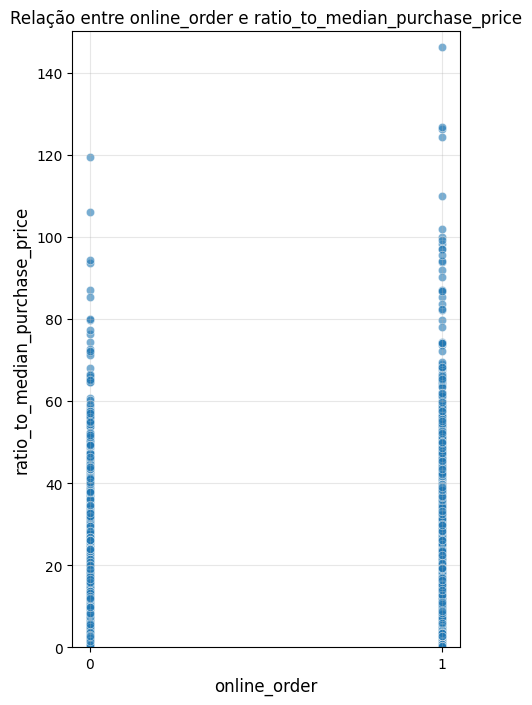

In [6]:
online_order = 'online_order'
ratio_to_median_purchase_price = 'ratio_to_median_purchase_price'

var_x = online_order
var_y = ratio_to_median_purchase_price

if var_x in df.columns and var_y in df.columns:
    plt.figure(figsize=(5, 8))
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.6)
    plt.title(f'Relação entre {var_x} e {var_y}')
    plt.xlabel(var_x, fontsize=12)
    plt.ylabel(var_y, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks([0, 1])
    plt.ylim(0, 150)
    plt.show()

**Insight 2:** Como esperado, o gráfico mostra que as compras mais caras tendem a ser online. Isso sugere que o valor da compra é um forte candidato para nosso modelo, já que também acreditamos que a maioria das fraudes são através de compras online.


---
## 4. Análise Multivariada: Aprofundando nos Padrões

Para aprofundar, usamos um heatmap para ter uma visão geral de todas as correlações e um scatter plot com hue para investigar subgrupos.

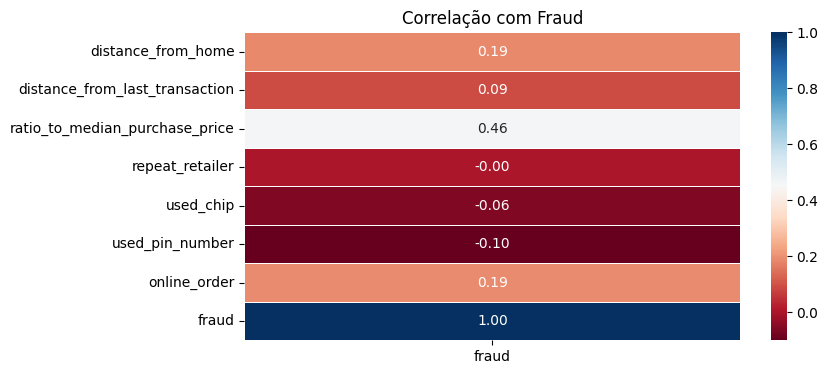

In [7]:
correlation_matrix = df.corr()

# criar o heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix[['fraud']], annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlação com Fraud')
plt.show()

In [ ]:
colunas_para_pairplot = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

if len(colunas_para_pairplot) > 1 and 'fraud' in df.columns:
    sns.pairplot(df[colunas_para_pairplot + ['fraud']], diag_kind='kde', hue='fraud')
    plt.suptitle('Pair Plot', y=1.02, fontsize=16)
    plt.show()

Insight 3: O heatmap revela uma correlação muito forte entre o preço de uma compra e presença de fraude, igual nós sugerimos no insight 2 .

O pair plot revela uma correlação surpreendente entre 'used_pin_number' (uso de senha) e 'distance_from_last_transaction' (distancia entre a compra atual e a compra anterior).
Embora não diretamente ligada à nossa variável-alvo, isso pode indicar que a primeira compra em uma viagem costuma ser uma compra barata, não necessitando o uso de senha. Isso por que, na nossa interpretação, a principal causa de uma compra distante da compra anterior é a primeira compra em uma viagem ou a primeira compra ao retornar de uma viagem. Isso pois, a partir dessa, as outras são em uma localização próxima.

---
## 5. Conclusão e Próximos Passos para a Modelagem

### Resumo dos Principais Achados:


* Achado 1: Quase todas as fraudes são em compras online.
* Achado 2: O valor das compras e a distância entre a compra e a casa do titular tem uma correlação inversa. Quanto mais perto de casa, maior o valor da compra.
* Achado 3: A maior parte das fraudes são em lojas novas, ou seja, lojas em que o titular nunca havia comprado.

**Recomendação para a Modelagem:** Com base nesta análise, as variáveis mais promissoras para incluir em um modelo preditivo para 'fraud' são:
1. Compra Online [online_order]  (devido à sua forte correlação)
2. Valor da Compra [ratio_to_median_purchase_price] (devido à sua correlação significativa com o alvo e com outras variáveis)
3. Uso de Senha [used_pin_number]  (apesar da correlação fraca, ela pode interagir com outras variáveis)